In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [3]:
import matplotlib.pyplot as plt

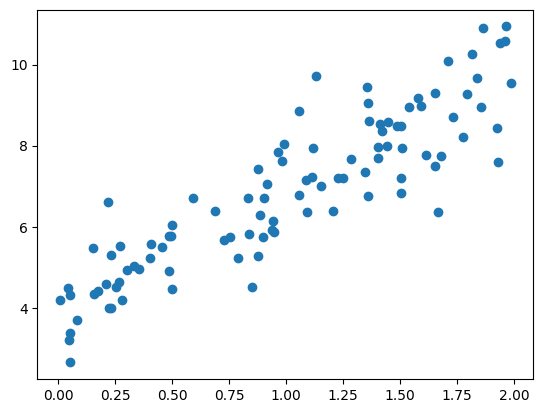

In [4]:
plt.scatter(x=X, y=y)

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.95927199],
       [2.89114959]])

(0.0, 2.0, 0.0, 15.0)

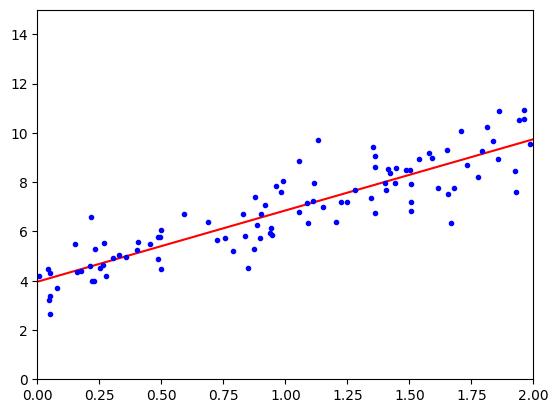

In [7]:
# Now make predictions with the theta_best
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2,0,15])

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([3.95927199]), array([[2.89114959]]))

In [9]:
lin_reg.predict(X_new)

array([[3.95927199],
       [9.74157118]])

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [12]:
theta_best_svd

array([[3.95927199],
       [2.89114959]])

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[3.95927199],
       [2.89114959]])